In [511]:
import xml.etree.ElementTree as ET
import pandas as pd
import glob
import errno

In [512]:
train_numbers_df = pd.DataFrame()

path = './data/bp_bg_meters/train_annotations/*.xml'   
files = glob.glob(path)   
image_id = 0
for name in files: 
    try:
        print("Parsing file", name)
        annotation_xml = ET.parse(name)
        image_path = annotation_xml.getroot().find('path').text
        box_id = 0
        for box in annotation_xml.getroot().findall('object'):
            box_class = box.find("name").text
            
            box_coords = box.find('bndbox')
            box_xmin = box_coords.find('xmin').text
            box_ymin = box_coords.find('ymin').text
            box_xmax = box_coords.find('xmax').text
            box_ymax = box_coords.find('ymax').text
            
            train_number_row = pd.Series({
                    'image_id': image_id,
                    'image_path': image_path,
                    'box_order': box_id,
                    'class': box_class, 
                    'xmin': box_xmin, 
                    'ymin': box_ymin, 
                    'xmax': box_xmax,
                    'ymax': box_ymax
            }) 
            train_numbers_df = train_numbers_df.append(train_number_row, ignore_index=True)
            box_id += 1
        image_id += 1
    except IOError as exc:
        if exc.errno != errno.EISDIR: # Do not fail if a directory is found, just ignore it.
            raise # Propagate other kinds of IOError.

Parsing file ./data/bp_bg_meters/train_annotations/IMG_5839.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_133325.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_3904.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_132007.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_1915.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5794.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5958.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_133250.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_4688.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_9347.xml
Parsing file ./data/bp_bg_meters/train_annotations/20150528_133318.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_6128.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMAG0076.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5810.xml
Parsing file ./data/bp_bg_meters/train_annotations/IMG_5838.xml
Parsing file

In [80]:
train_numbers_df.head(10)

,box_order,class,image_id,image_path,xmax,xmin,ymax,ymin
0,0.0,1,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2166,1740,2070,1799
1,1.0,5,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2186,1710,1775,1514
2,2.0,0,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2131,1690,1535,1194
3,3.0,9,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2661,2165,1785,1469
4,4.0,4,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2601,2135,1455,1154
5,5.0,7,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,3141,2655,1725,1339
6,6.0,7,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,3126,2620,1380,1114
7,0.0,4,1.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2201,1480,1693,1232
8,1.0,4,1.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2176,1485,1158,767
9,0.0,6,2.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2296,1270,2020,1474


In [312]:
train_numbers_df.shape

(1086, 8)

In [498]:
test_numbers_df = pd.DataFrame()

In [499]:
path = './data/bp_bg_meters/test_annotations/*.xml'   
files = glob.glob(path)   
image_id = train_numbers_df.shape[0] + 1
for name in files: 
    try:
        print("Parsing file", name)
        annotation_xml = ET.parse(name)
        image_path = annotation_xml.getroot().find('path').text
        box_id = 0
        for box in annotation_xml.getroot().findall('object'):
            box_class = box.find("name").text
            
            box_coords = box.find('bndbox')
            box_xmin = box_coords.find('xmin').text
            box_ymin = box_coords.find('ymin').text
            box_xmax = box_coords.find('xmax').text
            box_ymax = box_coords.find('ymax').text
            
            test_number_row = pd.Series({
                    'image_id': image_id,
                    'image_path': image_path,
                    'box_order': box_id,
                    'class': box_class, 
                    'xmin': box_xmin, 
                    'ymin': box_ymin, 
                    'xmax': box_xmax,
                    'ymax': box_ymax
            }) 
            test_numbers_df = test_numbers_df.append(test_number_row, ignore_index=True)
            box_id += 1
        image_id += 1
    except IOError as exc:
        if exc.errno != errno.EISDIR: # Do not fail if a directory is found, just ignore it.
            raise # Propagate other kinds of IOError.

Parsing file ./data/bp_bg_meters/test_annotations/IMG_0028.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_5811.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMAG0077.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_3051.xml
Parsing file ./data/bp_bg_meters/test_annotations/20150528_133319.xml
Parsing file ./data/bp_bg_meters/test_annotations/20150528_101546.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_4892.xml
Parsing file ./data/bp_bg_meters/test_annotations/20150528_133251.xml
Parsing file ./data/bp_bg_meters/test_annotations/20170817_132809.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_5959.xml
Parsing file ./data/bp_bg_meters/test_annotations/20170817_124716.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_5965.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_9838.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_1294.xml
Parsing file ./data/bp_bg_meters/test_annotations/IMG_5780.xml
Parsing file ./data/

In [500]:
train_numbers_df = train_numbers_df.append(test_numbers_df)
train_numbers_df.shape

(2190, 8)

In [316]:
from matplotlib import pyplot as plt

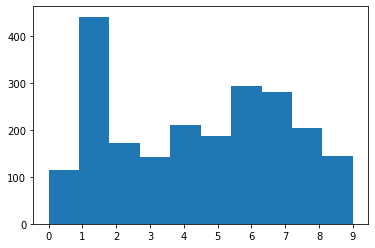

In [317]:
plt.hist(train_numbers_df['class'].sort_values(ascending=True))
plt.show()

In [514]:
train_numbers_df['width'] = train_numbers_df['xmax'].astype(int) - train_numbers_df['xmin'].astype(int)
train_numbers_df['height'] = train_numbers_df['ymax'].astype(int) - train_numbers_df['ymin'].astype(int)

train_numbers_df['portrait'] = train_numbers_df.apply(
    (lambda x: 1 if x['width'] < x['height'] else 0)
, axis=1)

In [454]:
train_numbers_df['image_path'].head()

0    /Users/gbishop/lighthouse/data_bootcamp/digita...
1    /Users/gbishop/lighthouse/data_bootcamp/digita...
2    /Users/gbishop/lighthouse/data_bootcamp/digita...
3    /Users/gbishop/lighthouse/data_bootcamp/digita...
4    /Users/gbishop/lighthouse/data_bootcamp/digita...
Name: image_path, dtype: object

In [502]:
image_orientation_df = train_numbers_df.groupby('image_id').agg({'portrait':'max'}).reset_index()
image_orientation_df.head()

,image_id,portrait
0,0.0,0
1,1.0,0
2,2.0,0
3,3.0,0
4,4.0,1


In [503]:
train_numbers_df = train_numbers_df.drop(columns=['portrait'])

In [504]:
train_numbers_df = pd.merge(train_numbers_df, image_orientation_df, on='image_id')

In [505]:
train_numbers_df.set_index(['image_id',"portrait"]).count(level='portrait')

,box_order,class,image_path,xmax,xmin,ymax,ymin,width,height
portrait,,,,,,,,,
0,1630,1630,1630,1630,1630,1630,1630,1630,1630
1,560,560,560,560,560,560,560,560,560


In [324]:
# 1630 landscape, 560 portrait

## Get the digit image from the image file

/Users/gbishop/lighthouse/data_bootcamp/digital-display-reader/data/bp_bg_meters/train/IMG_5839.JPG co-ords x 1710 - 1514


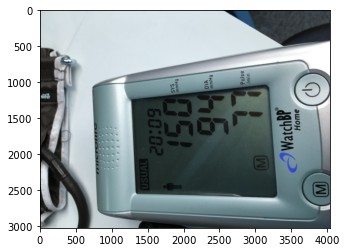

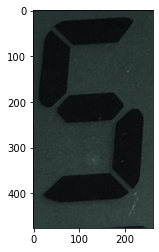

In [515]:
import cv2
import numpy as np

number_row = train_numbers_df.loc[1]
image_path = number_row['image_path']

x = int(number_row['xmin'])
y = int(number_row['ymin'])
print("{0} co-ords x {1} - {2}".format(image_path, x, y))
w = number_row['width']
h = number_row['height']
image = cv2.imread(image_path)

if (not number_row['portrait']):
    image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE) 

num_img = image[y:y+h, x:x+w]

if (not number_row['portrait']):
    num_img = cv2.rotate(num_img, cv2.ROTATE_90_CLOCKWISE) 

plt.imshow(image)
plt.show()
plt.imshow(num_img)
plt.show()


In [100]:
type(num_img)

numpy.ndarray

In [108]:
num_img.shape

(476, 261, 3)

In [109]:
# Save as numpy.memmap to a binary file, so you don't process over and over

<module 'lhl_build_dataframe' from '/Users/gbishop/lighthouse/data_bootcamp/digital-display-reader/lhl_build_dataframe.py'>

In [506]:
import char_bounding.lhl_image_transform as lhl
import importlib
import imutils
importlib.reload(lhl)

<module 'char_bounding.lhl_image_transform' from '/Users/gbishop/lighthouse/data_bootcamp/digital-display-reader/char_bounding/lhl_image_transform.py'>

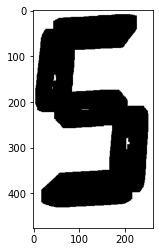

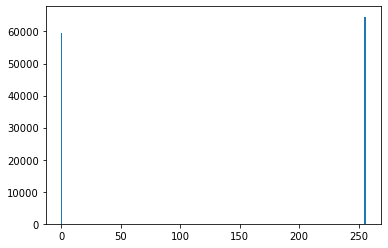

In [257]:
num_img_p = lhl.img_process(num_img)
lhl.plot_image(num_img_p)
plt.hist(num_img_p.ravel(),256,[0,256]); plt.show()

In [114]:
num_img_p.shape

(476, 261)

In [455]:
dir_path = train_numbers_df.loc[0]['image_path']

In [461]:
print(dir_path)
dir_arr = dir_path.split('/')
print(dir_arr[9])

/Users/gbishop/lighthouse/data_bootcamp/digital-display-reader/data/bp_bg_meters/train/IMG_5839.JPG
IMG_5839.JPG


In [452]:
negative_img_path_arr = ['20150528_131957.jpg',
'20150528_132004.jpg',
'20150528_132006.jpg',
'20150528_132009.jpg',
'20150528_133251.jpg',
'20150528_133253.jpg',
'20150528_133255.jpg',
'20150528_133257.jpg',
'20150528_133259.jpg',
'20150528_133301.jpg',
'20150528_133303.jpg',
'20150528_133306.jpg',
'20150528_133308.jpg',
'20150528_133311.jpg',
'20150528_133314.jpg',
'20150528_133316.jpg',
'20150528_133319.jpg',
'20150528_133322.jpg',
'20150528_133327.jpg',
'20150528_133330.jpg',
'20150528_133345.jpg',
'20150528_133401.jpg',
'20150528_133404.jpg',
'20150528_133413.jpg',
'20150528_134255.jpg',
'IMG_0130.JPG',
'IMG_0371.JPG',
'IMG_0482.JPG',
'IMG_0883.JPG',
'IMG_1276.JPG',
'IMG_1408.JPG',
'IMG_1482.JPG',
'IMG_1597.JPG',
'IMG_1710.JPG',
'IMG_2164.JPG',
'IMG_2374.JPG',
'IMG_2600.JPG',
'IMG_2800.JPG',
'IMG_3635.JPG',
'IMG_3739.JPG',
'IMG_4005.JPG',
'IMG_4232.JPG',
'IMG_4655.JPG',
'IMG_4892.JPG',
'IMG_48922.JPG',
'IMG_5191.JPG',
'IMG_5472.JPG',
'IMG_6134.JPG',
'IMG_6681.JPG',
'IMG_6905.JPG',
'IMG_7026.JPG',
'IMG_7292.JPG',
'IMG_7426.JPG',
'IMG_7470.JPG',
'IMG_7571.JPG',
'IMG_7713.JPG',
'IMG_8234.JPG',
'IMG_8915.JPG',
'IMG_9235.JPG',
'IMG_9415.JPG',
'IMG_9592.JPG',
'20150528_132000.jpg',
'20150528_132005.jpg',
'20150528_132007.jpg',
'20150528_133250.jpg',
'20150528_133252.jpg',
'20150528_133254.jpg',
'20150528_133256.jpg',
'20150528_133258.jpg',
'20150528_133300.jpg',
'20150528_133302.jpg',
'20150528_133305.jpg',
'20150528_133307.jpg',
'20150528_133309.jpg',
'20150528_133312.jpg',
'20150528_133315.jpg',
'20150528_133318.jpg',
'20150528_133320.jpg',
'20150528_133325.jpg',
'20150528_133328.jpg',
'20150528_133334.jpg',
'20150528_133351.jpg',
'20150528_133402.jpg',
'20150528_133406.jpg',
'20150528_134235.jpg',
'IMG_0111.JPG',
'IMG_0183.JPG',
'IMG_0390.JPG',
'IMG_0696.JPG',
'IMG_1203.JPG',
'IMG_1286.JPG',
'IMG_1481.JPG',
'IMG_1526.JPG',
'IMG_1610.JPG',
'IMG_1838.JPG',
'IMG_2185.JPG',
'IMG_2479.JPG',
'IMG_2765.JPG',
'IMG_2990.JPG',
'IMG_3651.JPG',
'IMG_3904.JPG',
'IMG_4135.JPG',
'IMG_4583.JPG',
'IMG_4773.JPG',
'IMG_4974.JPG',
'IMG_51912.JPG',
'IMG_5307.JPG',
'IMG_5879.JPG',
'IMG_6179.JPG',
'IMG_6732.JPG',
'IMG_6965.JPG',
'IMG_7267.JPG',
'IMG_7412.JPG',
'IMG_7468.JPG',
'IMG_7503.JPG',
'IMG_7652.JPG',
'IMG_7987.JPG',
'IMG_8558.JPG',
'IMG_9142.JPG',
'IMG_9347.JPG',
'IMG_9427.JPG',
'IMG_9940.JPG']

In [507]:
import char_bounding.lhl_image_transform as lhl

def get_orig_image_digit_array(x_row):
    img_num_arr = lhl.extract_bounded_image(
        x_row['image_path'],
        int(x_row['xmin']),
        int(x_row['ymin']),
        x_row['width'],
        x_row['height'],
        x_row['portrait']
    )
    
    return img_num_arr

def get_process_image_digit_array(x_row):
    return lhl.img_process(x_row['img_num_arr'])

def get_inv_image_digit_array(x_row):
    #img_processed = x_row['img_process_arr']
    img_num_arr = x_row['img_num_arr']
    
    dir_arr = x_row['image_path'].split('/')
    image_name = dir_arr[9]
    if image_name in negative_img_path_arr:
        img_num_arr = cv2.bitwise_not(img_num_arr)
    
    #img_ravel = img_processed.ravel()
    #num_black = (img_ravel == 0).sum()
    #num_white = (img_ravel == 255).sum()
    #per_black = num_black / len(img_ravel)
    #if (per_black < 0.40):
    #    img_num_arr = cv2.bitwise_not(img_num_arr)

    return img_num_arr


def get_bw_image_digit_array(x_row):
    # make it 3 layers
    img_num_bw_arr = x_row['img_process_arr']
    img_num_arr = x_row['img_num_arr']
    img_num_bw_arr_3d = np.zeros_like(img_num_arr)
    img_num_bw_arr_3d[:,:,0] = img_num_bw_arr
    img_num_bw_arr_3d[:,:,1] = img_num_bw_arr
    img_num_bw_arr_3d[:,:,2] = img_num_bw_arr
    
    return img_num_bw_arr_3d


In [518]:
train_numbers_df['img_num_arr'] = train_numbers_df.apply(
    (lambda x: get_orig_image_digit_array(x))
, axis=1)

In [534]:
import lhl_build_dataframe as lhl_df
import importlib
importlib.reload(lhl_df)

<module 'lhl_build_dataframe' from '/Users/gbishop/lighthouse/data_bootcamp/digital-display-reader/lhl_build_dataframe.py'>

In [530]:
a = []
a.append(train_numbers_df.loc[0]['img_num_arr'])
a.append(train_numbers_df.loc[1]['img_num_arr'])
a.append(train_numbers_df.loc[2]['img_num_arr'])
a.append(train_numbers_df.loc[3]['img_num_arr'])
a.append(train_numbers_df.loc[4]['img_num_arr'])
a = np.array(a)
a.shape

<ipython-input-530-6093b9352628>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.array(a)


(5,)

In [544]:
importlib.reload(lhl_df)
arr_resize = lhl_df.process_resize_with_distortion(a)
arr_resize.shape


(5,)
(5, 600, 400, 3)
Resized to:  (1, 600, 400, 3)
Resized to:  (1, 600, 400, 3)
Resized to:  (1, 600, 400, 3)
Resized to:  (1, 600, 400, 3)
Resized to:  (1, 600, 400, 3)


(5, 600, 400, 3)

In [548]:
list(arr_resize)

[array([[[34, 47, 45],
         [34, 47, 45],
         [34, 47, 45],
         ...,
         [40, 54, 52],
         [41, 55, 53],
         [43, 57, 55]],
 
        [[34, 47, 45],
         [34, 47, 45],
         [34, 47, 45],
         ...,
         [39, 53, 51],
         [39, 54, 52],
         [41, 55, 52]],
 
        [[35, 48, 46],
         [35, 48, 46],
         [35, 48, 46],
         ...,
         [38, 52, 50],
         [38, 52, 50],
         [39, 53, 50]],
 
        ...,
 
        [[42, 62, 63],
         [42, 62, 63],
         [43, 63, 64],
         ...,
         [42, 56, 54],
         [43, 57, 55],
         [45, 59, 57]],
 
        [[43, 63, 64],
         [43, 63, 64],
         [44, 64, 65],
         ...,
         [43, 57, 55],
         [44, 58, 56],
         [45, 59, 57]],
 
        [[44, 64, 65],
         [45, 65, 66],
         [45, 65, 66],
         ...,
         [44, 58, 56],
         [45, 59, 57],
         [46, 60, 58]]], dtype=object),
 array([[[38, 51, 49],
         [38, 51, 

In [509]:
import pickle

# Put where Docker can find it
filename = "../lighthouse-data-notes/week_11/training_df.pk"
pickle.dump(train_numbers_df, open(filename, 'wb'))

In [510]:
import lhl_build_dataframe as lhl_build

In [333]:
train_numbers_df['img_process_arr'] = train_numbers_df.apply(
    (lambda x: get_process_image_digit_array(x))
, axis=1)

In [466]:
train_numbers_df['img_inv_arr'] = train_numbers_df.apply(
    (lambda x: get_inv_image_digit_array(x))
, axis=1)

In [343]:
train_numbers_df['img_bw_arr'] = train_numbers_df.apply(
    (lambda x: get_bw_image_digit_array(x))
, axis=1)

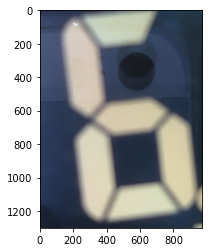

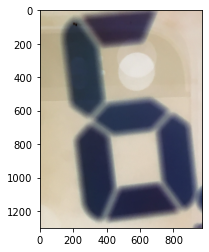

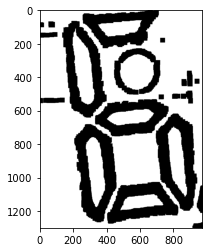

In [481]:
#id_x = 1152
#id_x = 152
id_x = 666
img_test = train_numbers_df.loc[id_x]['img_num_arr']
lhl.plot_image(img_test)
img_inv_test = train_numbers_df.loc[id_x]['img_inv_arr']
lhl.plot_image(img_inv_test)
img_test2 = lhl.img_process(img_inv_test)
lhl.plot_image(img_test2)


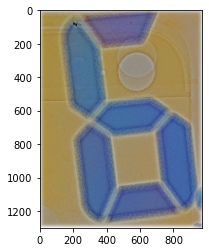

(1301, 971, 3)


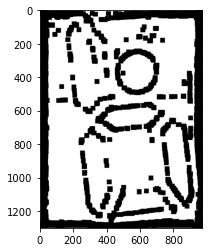

In [482]:

retina = cv2.bioinspired_Retina.create((img_test.shape[1], img_test.shape[0]))
for i in range(5):
    retina.run(img_inv_test)
# get our processed image :)
retinaOut_parvo = retina.getParvo()
#retinaOut_parvo = retina.getMagno()
lhl.plot_image(retinaOut_parvo)
print(retinaOut_parvo.shape)
img_test2 = lhl.img_process(retinaOut_parvo,
                gray=True, 
                flatten=True, 
                close_erode=True, 
                flatten_2=False,
                threshold_block_size=91,
                erode_iterations=2)

lhl.plot_image(img_test2)

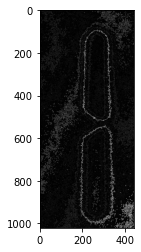

In [451]:
img_test2 = lhl.img_process(img_test, gray=True, 
                flatten=False, 
                close_erode=False, 
                flatten_2=False,
                threshold_block_size=161,
                erode_iterations=2)

kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")
kernel2 = np.array((
        [-1, 0, -1],
        [0, 0, 0],
        [-1, 0, -1]), dtype="int")

res = cv2.morphologyEx(img_test2, cv2.MORPH_HITMISS, kernel)



lhl.plot_image(res)
#lhl.plot_image(res2)

### Resize all digits to the same dimensions

In [289]:
# Get the max width of all digits

def get_digit_width(row):
    return row['img_num_arr'].shape[1]

def get_digit_height(row):
    return row['img_num_arr'].shape[0]

train_numbers_df['img_num_width'] = train_numbers_df.apply(
    (lambda x: get_digit_width(x))
, axis=1)



In [290]:
train_numbers_df['img_num_height'] = train_numbers_df.apply(
    (lambda x: get_digit_height(x))
, axis=1)

In [291]:
print("Max width of a digit", train_numbers_df['img_num_width'].max())
print("Max height of a digit", train_numbers_df['img_num_height'].max())

Max width of a digit 971
Max height of a digit 1301


In [292]:
print("Average width of a digit", train_numbers_df['img_num_width'].mean())
print("Average height of a digit", train_numbers_df['img_num_height'].mean())

Average width of a digit 354.1731123388582
Average height of a digit 564.2946593001842


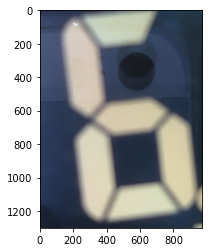

In [229]:
max_width_img = train_numbers_df[train_numbers_df['img_num_width']==train_numbers_df['img_num_width'].max()]
max_width_img['img_num_arr']
lhl.plot_image(train_numbers_df.loc[666]['img_num_arr'])

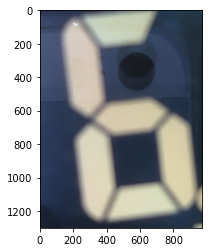

In [230]:
max_width_img = train_numbers_df[train_numbers_df['img_num_height']==train_numbers_df['img_num_height'].max()]
max_width_img['img_num_arr']
lhl.plot_image(train_numbers_df.loc[666]['img_num_arr'])

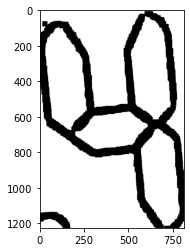

In [277]:
this_img = train_numbers_df.loc[667]['img_num_arr']
this_img_p = lhl.img_process(train_numbers_df.loc[667]['img_num_arr'])
#lhl.plot_image(train_numbers_df.loc[667]['img_num_arr'])
#plt.hist(train_numbers_df.loc[667]['img_num_arr'].ravel(),256,[0,256]); plt.show()

#this_img_inv = cv2.bitwise_not(train_numbers_df.loc[667]['img_num_arr'])
#lhl.plot_image(this_img_inv)

#this_img_inv_p = lhl.img_process(this_img_inv)
#lhl.plot_image(this_img_inv_p)

#lhl.plot_image(this_img_p)
#plt.hist(this_img_p.ravel(),256,[0,256]); plt.show()

#print(this_img)
this_img_gray_3d = np.zeros_like(this_img)
this_img_gray_3d[:,:,0] = this_img_p
this_img_gray_3d[:,:,1] = this_img_p
this_img_gray_3d[:,:,2] = this_img_p

#print(this_img_gray_3d)
lhl.plot_image(this_img_gray_3d)

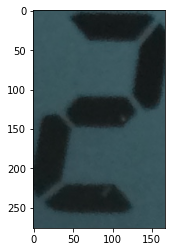

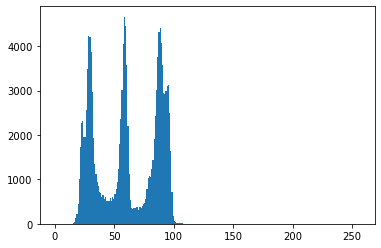

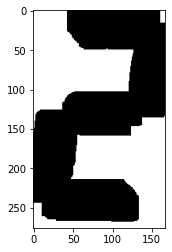

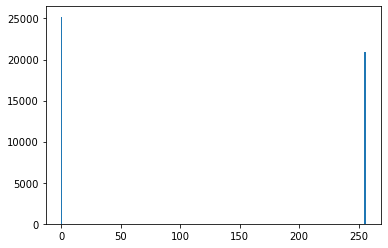

In [260]:
this_img_p = lhl.img_process(train_numbers_df.loc[150]['img_num_arr'])
lhl.plot_image(train_numbers_df.loc[150]['img_num_arr'])
plt.hist(train_numbers_df.loc[150]['img_num_arr'].ravel(),256,[0,256]); plt.show()

lhl.plot_image(this_img_p)
plt.hist(this_img_p.ravel(),256,[0,256]); plt.show()

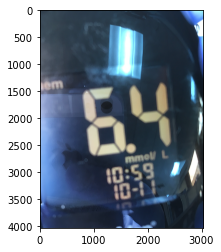

In [231]:
image = cv2.imread(train_numbers_df.loc[666]['image_path'])
lhl.plot_image(image)

In [127]:
train_numbers_df.head()

,box_order,class,image_id,image_path,xmax,xmin,ymax,ymin,width,height,portrait,img_num_arr,img_num_width,img_num_height
0,0.0,1,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2166,1740,2070,1799,426,271,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",271,426
1,1.0,5,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2186,1710,1775,1514,476,261,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",261,476
2,2.0,0,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2131,1690,1535,1194,441,341,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",341,441
3,3.0,9,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2661,2165,1785,1469,496,316,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",316,496
4,4.0,4,0.0,/Users/gbishop/lighthouse/data_bootcamp/digita...,2601,2135,1455,1154,466,301,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",301,466


### Resize all numbers to width of 400 and then find the max height

In [484]:
train_numbers_df.columns

Index(['box_order', 'class', 'image_id', 'image_path', 'xmax', 'xmin', 'ymax',
       'ymin', 'width', 'height', 'portrait', 'img_num_arr', 'img_num_bw_arr',
       'img_process_arr', 'img_inv_arr', 'img_bw_arr'],
      dtype='object')

In [485]:
def resize_by_width(row, column, new_width=400):
        
    orig_width = row[column].shape[1]
    orig_height = row[column].shape[0]
    
    # Calculate the scale to get the new width
    scale_percent = (new_width / orig_width) * 100
    
    width = int(orig_width * scale_percent / 100)
    height = int(orig_height * scale_percent / 100)
    dim = (width, height)
  
    # resize image
    resized = cv2.resize(row[column], dim, interpolation = cv2.INTER_AREA)
    return resized
    
    

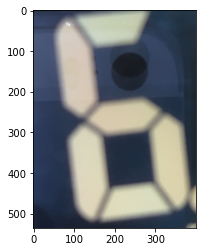

In [233]:
img_resized = resize_by_width(train_numbers_df.loc[666], 400)
lhl.plot_image(img_resized)

In [486]:
train_numbers_df['img_inv_arr_resize'] = train_numbers_df.apply(
    (lambda x: resize_by_width(x, 'img_inv_arr', 400))
, axis=1)

In [235]:
def get_digit_resize_height(row):
    return row['img_num_arr_resize'].shape[0]

train_numbers_df['img_num_resize_height'] = train_numbers_df.apply(
    (lambda x: get_digit_resize_height(x))
, axis=1)

In [236]:
print("Max height of a digit", train_numbers_df['img_num_resize_height'].max())

Max height of a digit 1372


In [237]:
max_width_img = train_numbers_df[train_numbers_df['img_num_resize_height']==train_numbers_df['img_num_resize_height'].max()]
max_width_img['img_num_arr']

373    [[[213, 217, 218], [216, 219, 223], [216, 219,...
Name: img_num_arr, dtype: object

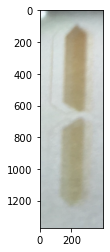

In [238]:
lhl.plot_image(train_numbers_df.loc[373]['img_num_arr_resize'])

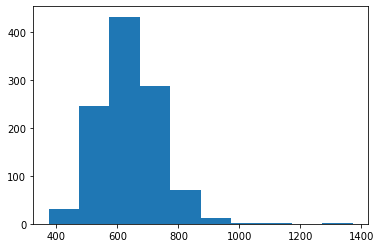

In [239]:
plt.hist(train_numbers_df['img_num_resize_height'].sort_values(ascending=True))
plt.show()

In [488]:
def resize_with_distortion(row, column, new_width=400, new_height=600):
        
    dim = (new_width, new_height)
  
    # resize image
    resized = cv2.resize(row[column], dim, interpolation = cv2.INTER_AREA)
    return resized

In [490]:
train_numbers_df['img_inv_arr_resize'] = train_numbers_df.apply(
    (lambda x: resize_with_distortion(x, 'img_inv_arr', 400, 600))
, axis=1)

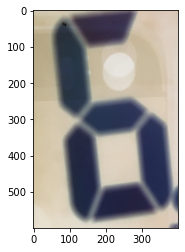

In [491]:
lhl.plot_image(train_numbers_df.loc[666]['img_inv_arr_resize'])

In [300]:
train_numbers_df.loc[666]['img_num_arr_resize'].shape

(600, 400, 3)

In [244]:
train_numbers_df.shape

(1086, 16)

In [492]:
def class_to_array(row):        
    class_arr = np.array([int(row['class'])])
    return class_arr

In [493]:
train_numbers_df['class_arr'] = train_numbers_df.apply(
    (lambda x: class_to_array(x))
, axis=1)

In [494]:
img_arr = train_numbers_df.loc[0]['img_inv_arr_resize']
img_arr.shape
#img_arr_3d = np.expand_dims(img_arr, axis=2)
#img_arr_3d.shape

(600, 400, 3)

TypeError: Invalid shape (600, 400, 1, 3) for image data

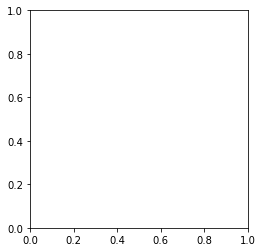

In [304]:
lhl.plot_image(img_arr_3d)

In [197]:
def image_to_3d(row):        
    return np.expand_dims(row['img_num_arr_resize'], axis=2)

In [198]:
train_numbers_df['img_num_arr_resize_3d'] = train_numbers_df.apply(
    (lambda x: image_to_3d(x))
, axis=1)

In [249]:
class_arr = np.array(train_numbers_df['class_arr'].values.tolist())
class_arr.shape

(1086, 1)

In [495]:
import pickle

# Put where Docker can find it
filename = "../lighthouse-data-notes/week_11/training_df.pk"
pickle.dump(train_numbers_df, open(filename, 'wb'))